In [9]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model,svm
from sklearn.svm import SVR
from time import time

In [10]:
datamain = pd.read_csv('CICESEDATA.csv')
datamain.head()

,Unnamed: 0,Mes,Dia,Anio,Evaporacion,Calor,Precipitacion,TempMax,TempMin,TempProm
0,0,2,1,1922,3.0,9.50,0.0,25.0,14.0,19.50
1,1,2,2,1922,2.9,9.25,0.0,24.5,14.0,19.25
2,2,2,3,1922,3.7,8.50,0.0,24.0,13.0,18.50
3,3,2,4,1922,3.1,8.00,0.0,25.0,11.0,18.00
4,4,2,5,1922,4.3,9.50,0.0,25.0,14.0,19.50


In [11]:
datamain = datamain.fillna(0)
datamain.describe()
feature_cols = ["Mes", "Dia", "Anio", "Evaporacion", "Calor", "Precipitacion"]
y_col = ['TempMax']

In [12]:
df1922to2015 = datamain[(datamain['Anio']>=1922) & (datamain['Anio'] <= 2015)]
df2016 = datamain[(datamain['Anio'] >= 2016)]
dXtrain, dYtrain = df1922to2015[feature_cols] ,  df1922to2015[y_col]
dXtest, dYtest = df2016[feature_cols] ,  df2016[y_col]

In [13]:
lm = smf.ols(formula="TempMax~Mes+Dia+Anio+Evaporacion+Calor+Precipitacion", data=df1922to2015).fit()

In [14]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.764      
Dependent Variable: TempMax          AIC:                177517.6861
Date:               2019-03-28 13:45 BIC:                177576.7868
No. Observations:   34302            Log-Likelihood:     -88752.    
Df Model:           6                F-statistic:        1.849e+04  
Df Residuals:       34295            Prob (F-statistic): 0.00       
R-squared:          0.764            Scale:              10.351     
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept       -0.9463    1.9238   -0.4919  0.6228  -4.7170   2.8243
Mes             -0.0936    0.0051  -18.4578  0.0000  -0.1035  -0.0836
Dia              0.0003    0.0020    0.1414  0.8876  -0.0036   0.0041
Anio             0.0066    0.0010    6.7268  0.0000   0.0047   0.0085
Evaporacion      0.0398    0.0086    4.6478  0.0000   0.0230   0.0566
Calor            1.6452    0.0052  317.4160  0.0000   1.6351   1.6554
Precipitacion   -0.0794    0.0030  -26.4843  0.0000  -0.0852  -0.0735
--------------------------------------------------------------------
Omnibus:              9598.858      Durbin-Watson:         0.247    
Prob(Omnibus):        0.000         Jarque-Bera (JB):      30931.320
Skew:                 -1.425        Prob(JB):              0.000    
Kurtosis:             6.677         Condition No.:         218038   
====================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [15]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

In [16]:
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(dXtrain)
    lm = linear_model.LinearRegression()
    lm.fit(X_data, dYtrain)
    print("Regresión de grado " +str(d))
    print("R2:" +str(lm.score(X_data, dYtrain)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, dYtrain, lm.predict(X_data))

Regresión de grado 2
R2:0.90754877554136
[-1594.15788707]
[[-2.07588348e-10 -4.51223713e+00 -2.02294747e-03  1.57373685e+00
  -1.12616471e+01  2.07891243e+01 -5.80898836e-01  1.25632264e-01
   6.81681518e-03  1.51394851e-03 -1.31231314e-02 -4.24003088e-02
  -9.06002049e-03 -1.13605254e-04 -1.18568238e-05 -3.72275859e-04
  -2.06927486e-03 -3.54379388e-04 -3.86182254e-04  5.70682790e-03
  -8.58175608e-03  2.99780808e-04  8.86310099e-03  8.22172349e-03
  -4.08299656e-03 -1.11826600e-01  1.17835383e-04  1.03313065e-03]]
SSD: TempMax    138953.250941
dtype: float64, RSE: TempMax    2.012709
dtype: float64, Y_mean: TempMax    26.898044
dtype: float64, error: TempMax    7.482733
dtype: float64%
Regresión de grado 3
R2:0.9330909044501062
[-2326.95609659]
[[-3.69834211e-03  1.00057728e+02  3.86620931e+01  6.00713407e-01
  -2.88567101e+02  4.28833272e+02 -5.52248831e-01 -2.42239989e+00
  -7.14783856e-03 -8.53102699e-02  3.50579876e-01 -5.27017086e-01
  -1.00217285e-01  3.26079313e-02 -3.93085987

Regresión de grado 6
R2:0.9433188163972992
[-3591.93884192]
[[ 1.41026675e-06  5.42631267e-08 -1.19195536e-08  8.91722515e-10
  -4.40938927e-10 -3.82412508e-10 -4.25515111e-11  9.79972336e-11
   1.95339845e-11 -8.92617448e-12 -1.17357735e-12  2.75747015e-12
  -2.06790193e-11  1.37882238e-11 -2.28579214e-11  6.78565670e-12
  -4.35363820e-12 -1.53267496e-11 -9.25407773e-10 -2.34151963e-10
   4.00288265e-10  9.92337058e-12  3.72767176e-11 -3.12099153e-11
   1.13383392e-11  2.24255827e-11  9.25156466e-12 -1.33871653e-12
   1.82578846e-10  1.85770657e-10  1.43368882e-08  9.29648199e-11
   3.03789393e-11  1.52845800e-11 -4.25706338e-12  3.67684740e-09
   1.78409549e-11 -1.42402231e-10 -5.79478815e-11 -1.89830981e-08
   9.61357273e-09 -7.75356120e-09 -3.49575256e-09  1.00681534e-10
  -6.60803701e-11  4.46613564e-11  2.46801995e-11  4.07106277e-11
  -8.71705214e-11  6.15538068e-10  3.00154292e-10 -1.49678033e-10
  -1.89853079e-10  1.22504329e-10 -1.00381886e-09  4.69307232e-10
  -6.92578765e-0

Regresión de grado 7
R2:0.9443813585566408
[-2270.31223268]
[[-3.84180582e-11 -1.33156432e-11  3.89227681e-13 ...  2.74276465e-09
  -4.43159772e-10 -5.24680022e-11]]
SSD: TempMax    83594.252934
dtype: float64, RSE: TempMax    1.561115
dtype: float64, Y_mean: TempMax    26.898044
dtype: float64, error: TempMax    5.803823
dtype: float64%
Regresión de grado 8
R2:0.9439248894478868
[-1135.41747239]
[[-3.50152183e-13  1.75025270e-14 -2.08489632e-15 ...  1.81754388e-13
   8.58811487e-14  3.32494225e-12]]
SSD: TempMax    84280.321366
dtype: float64, RSE: TempMax    1.567508
dtype: float64, Y_mean: TempMax    26.898044
dtype: float64, error: TempMax    5.82759
dtype: float64%


MemoryError: 

In [14]:
X2_data = poly.fit_transform(dXtest)
print("R2:" +str(lm.score(X2_data, dYtest)))
regresion_validation(X2_data, dYtest, lm.predict(X2_data))

R2:0.8187752963613997
SSD: TempMax    597.512802
dtype: float64, RSE: TempMax    1.399664
dtype: float64, Y_mean: TempMax    29.609477
dtype: float64, error: TempMax    4.72708
dtype: float64%


In [65]:
res1 = dYtest['TempMax'].tolist()
res2 = pd.DataFrame(lm.predict(X2_data),columns = ['Prediccion2016'])
res3 = pd.DataFrame(res1,columns=['TempMax2016'])
Predic2016 = pd.concat([res3, res2], axis=1, sort = False)
Predic2016.head()

,TempMax2016,Prediccion2016
0,29.5,30.148935
1,29.0,29.807606
2,28.0,29.604457
3,28.5,30.020084
4,21.5,22.369699


In [12]:
X = dXtrain
Y = dYtrain['TempMax']
X.shape, Y.shape

((34302, 6), (34302,))

In [ ]:
C=1e3
X = dXtrain
Y = dYtrain
svr_lin = SVR(kernel="linear", C=C)
svr_rbf = SVR(kernel="rbf", C=C, gamma=0.1)
svr_pol = SVR(kernel="poly", C=C, degree=3)

y_lin = svr_lin.fit(X,Y).predict(X)
y_rbf = svr_rbf.fit(X,Y).predict(X)
y_pol = svr_pol.fit(X,Y).predict(X)

In [78]:
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [1e-4,1e-3,1e-2, 0.1, 0.2, 0.5],
        'C': [1,10,100,1000]
    },
    {
        'kernel':["linear"],
        'C':[1,10,100,1000]
    }
]

In [79]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(svm.SVR(kernel='rbf'), param_grid=parameters, cv=5)
clf.fit(X,Y)

In [72]:
start_time = time()
svr_lin = SVR(kernel="linear", C=1.0)
y_lin = svr_lin.fit(X,Y).predict(X)
elapsed_time = (time()-start_time)/60
elapsed_time

1.6125739097595215

In [63]:
start_time = time()
svr_rbf = SVR(kernel="rbf", C=1.0, gamma=0.1)
y_rbf = svr_rbf.fit(X,Y).predict(X)
y_rbf
elapsed_time = (time()-start_time)/60
elapsed_time

3.214698576927185

In [64]:
y_rbf

array([25.09974343, 24.83926826, 24.68132294, ..., 25.98717083,
       27.90014242, 28.22688837])

In [74]:
start_time = time()
svr_pol = SVR(kernel="poly", C=1.0, degree=2)
y_pol = svr_pol.fit(X,Y).predict(X)
elapsed_time = (time()-start_time)/60
elapsed_time

/home/eea/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


5.694342557589213

In [75]:
res1 = pd.DataFrame(y_lin,columns = ['PredicLinear'])
res2 = pd.DataFrame(y_rbf,columns = ['PredicRBF'])
res3 = pd.DataFrame(y_pol,columns = ['PredicPoly'])

result = pd.concat([Y, res1, res2, res3], axis=1, sort=False)
result.head()

,TempMax,PredicLinear,PredicRBF,PredicPoly
0,25.0,38.192581,25.099743,71588.181565
1,24.5,37.168093,24.839268,62745.336289
2,24.0,35.249774,24.681323,56918.656174
3,25.0,32.780651,24.708672,54211.211533
4,25.0,39.557983,25.099769,26703.130539


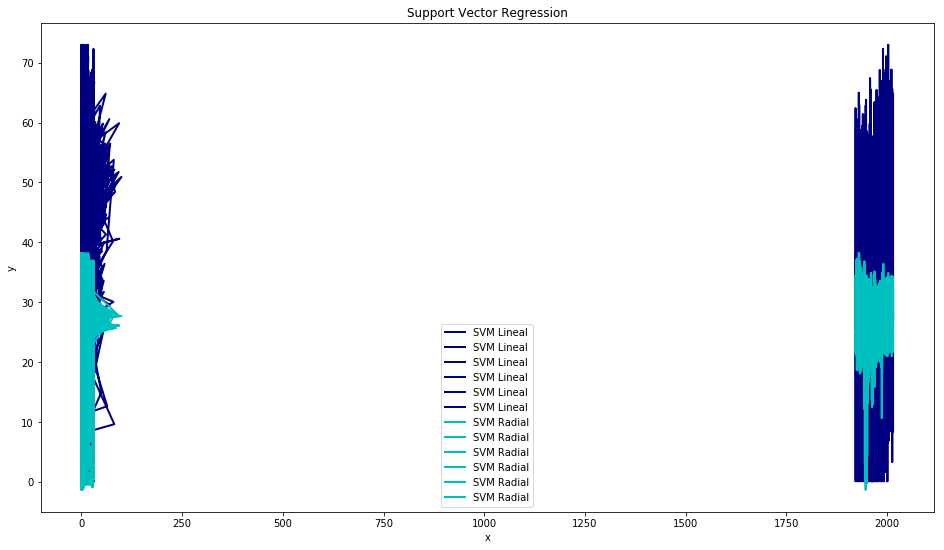

In [77]:
lw = 2
plt.figure(figsize=(16,9))
#plt.scatter(X,Y,color="darkorange", label ="data")
plt.plot(X,y_lin, color="navy", lw = lw, label = "SVM Lineal")
plt.plot(X,y_rbf, color="c", lw=lw, label="SVM Radial")
#plt.plot(X,y_pol, color="cornflowerblue", label="SVM Polinómico")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

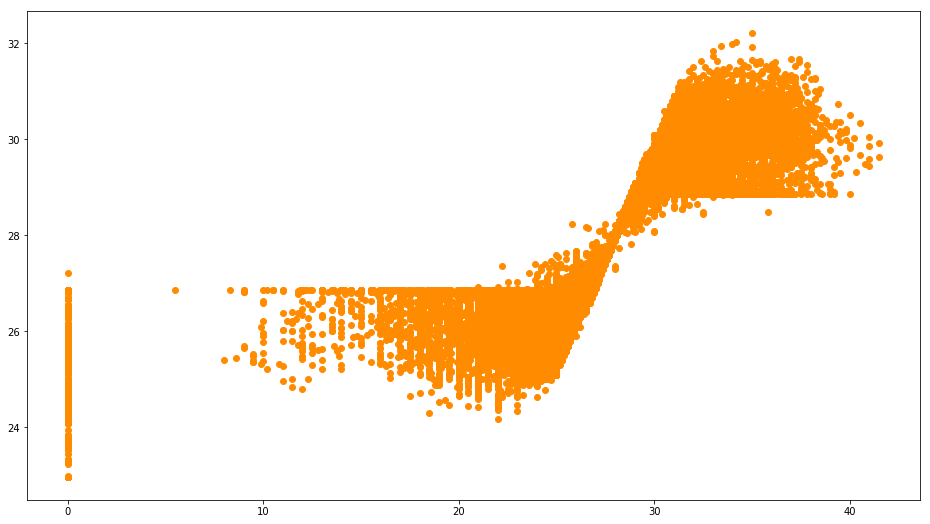